<a href="https://colab.research.google.com/github/kanikadchopra/Cryptography/blob/master/Smartphones_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai import *
from fastai.vision import *

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
classes = ['iphone', 'samsung']

for c in classes:
  folder = c 
  file = c + '.txt'
  
  path = Path(base_dir + 'data/phones')
  dest = path/folder
  dest.mkdir(parents=True, exist_ok=True)
  
  download_images(path/folder/file, dest, max_pics=200, max_workers=0)
  
  print(c + " images downloaded!")

samsung images downloaded!


In [0]:
for c in classes:
  print(c)
  verify_images(path/c, delete=True, max_size=500)

## Let's take a look at our DATA!

In [0]:
np.random.seed(45)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

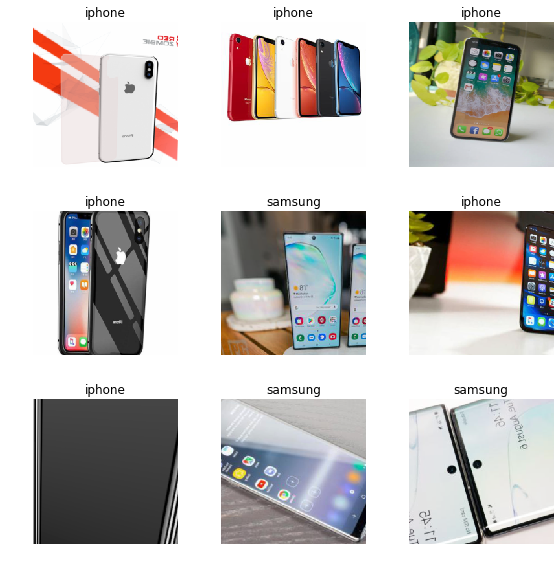

In [6]:
data.show_batch(rows=3, figsize=(8,8))

In [7]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['iphone', 'samsung'], 2, 312, 78)

## Let's train our model! 

In [8]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 110426318.70it/s]


In [10]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.890149,0.622257,0.371795,00:08
1,0.647956,0.416785,0.166667,00:06
2,0.510509,0.330615,0.128205,00:06
3,0.414574,0.302822,0.089744,00:06
4,0.362165,0.302108,0.089744,00:06


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [13]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


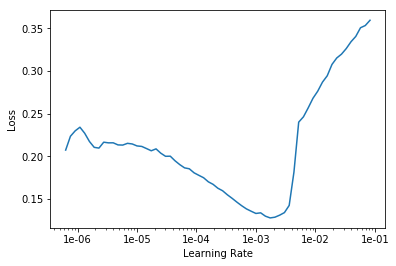

In [14]:
learn.recorder.plot()

In [15]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.234784,0.369274,0.128205,00:07
1,0.213827,0.409774,0.141026,00:07


In [0]:
learn.save('stage-2')

## Interpretation
Let's find out why our images are being misinterpreted when these are very different phones.

In [17]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (312 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
samsung,samsung,samsung,samsung,samsung
Path: /content/gdrive/My Drive/fastai-v3/data/phones;

Valid: LabelList (78 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
samsung,iphone,samsung,iphone,iphone
Path: /content/gdrive/My Drive/fastai-v3/data/phones;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

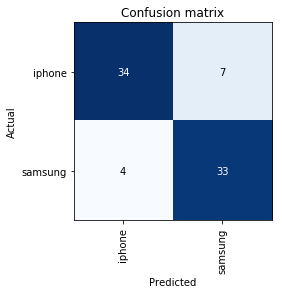

In [19]:
interp.plot_confusion_matrix()

In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')